In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
results = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/18-battery-optimisation/data/results/run_data_battery_1_time_2021-03-28-17-15-03.csv")
results['datetime'] = pd.to_datetime(results['datetime'], errors='coerce')
results

,Unnamed: 0,datetime,charge_solar,charge_load,discharge_size,current_solar,current_controlled_load_consumption,current_general_electricity_consumption,current_charge
0,0,2013-01-14 00:00:00,0.023116,1.000000,1.000000,0.0,0.000,0.073,1.000000
1,1,2013-01-14 00:30:00,0.507481,0.179449,0.899053,0.0,0.000,0.115,0.705551
2,2,2013-01-14 01:00:00,0.448375,0.386509,0.730378,0.0,1.094,0.024,0.269622
3,3,2013-01-14 01:30:00,0.685031,1.000000,1.000000,0.0,1.263,0.126,0.071756
4,4,2013-01-14 02:00:00,1.000000,1.000000,0.942382,0.0,1.250,0.319,0.287489
...,...,...,...,...,...,...,...,...,...
2347,2347,2013-06-30 21:30:00,0.154882,0.000000,0.924496,0.0,0.000,0.260,0.664496
2348,2348,2013-06-30 22:00:00,0.191617,0.000000,0.974297,0.0,0.000,0.274,0.700297
2349,2349,2013-06-30 22:30:00,0.152268,0.013031,0.950803,0.0,0.000,0.509,0.428771
2350,2350,2013-06-30 23:00:00,0.287949,0.000000,0.981416,0.0,0.000,0.166,0.815416


In [29]:
results = results.rename(columns={"charge_solar": "Solar Charge", "charge_load": "Electricty Charge", "discharge_size": "Discharge", "current_solar": "Solar Power", "current_controlled_load_consumption": "Controlled Electricity Demand", "current_general_electricity_consumption": "General Electricity Demand", "current_charge": "Battery Charge Level"})
results

,Unnamed: 0,datetime,Solar Charge,Electricty Charge,Discharge,Solar Power,Controlled Electricity Demand,General Electricity Demand,Battery Charge Level
0,0,2013-01-14 00:00:00,0.023116,1.000000,1.000000,0.0,0.000,0.073,1.000000
1,1,2013-01-14 00:30:00,0.507481,0.179449,0.899053,0.0,0.000,0.115,0.705551
2,2,2013-01-14 01:00:00,0.448375,0.386509,0.730378,0.0,1.094,0.024,0.269622
3,3,2013-01-14 01:30:00,0.685031,1.000000,1.000000,0.0,1.263,0.126,0.071756
4,4,2013-01-14 02:00:00,1.000000,1.000000,0.942382,0.0,1.250,0.319,0.287489
...,...,...,...,...,...,...,...,...,...
2347,2347,2013-06-30 21:30:00,0.154882,0.000000,0.924496,0.0,0.000,0.260,0.664496
2348,2348,2013-06-30 22:00:00,0.191617,0.000000,0.974297,0.0,0.000,0.274,0.700297
2349,2349,2013-06-30 22:30:00,0.152268,0.013031,0.950803,0.0,0.000,0.509,0.428771
2350,2350,2013-06-30 23:00:00,0.287949,0.000000,0.981416,0.0,0.000,0.166,0.815416


In [30]:
results_long = results.drop(columns=["Unnamed: 0"]).melt(id_vars=["datetime"])
results_long

,datetime,variable,value
0,2013-01-14 00:00:00,Solar Charge,0.023116
1,2013-01-14 00:30:00,Solar Charge,0.507481
2,2013-01-14 01:00:00,Solar Charge,0.448375
3,2013-01-14 01:30:00,Solar Charge,0.685031
4,2013-01-14 02:00:00,Solar Charge,1.000000
...,...,...,...
16459,2013-06-30 21:30:00,Battery Charge Level,0.664496
16460,2013-06-30 22:00:00,Battery Charge Level,0.700297
16461,2013-06-30 22:30:00,Battery Charge Level,0.428771
16462,2013-06-30 23:00:00,Battery Charge Level,0.815416


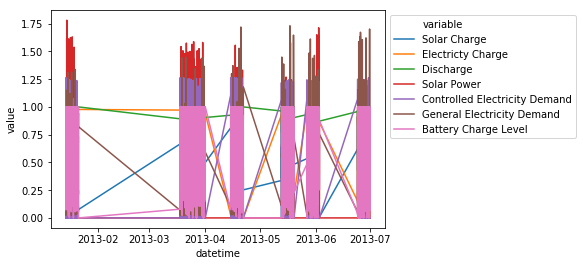

In [31]:
sns.lineplot(data=results_long, x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

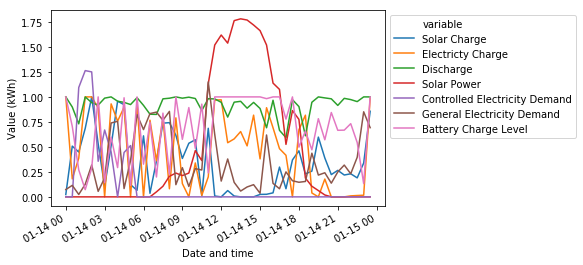

In [32]:
# see_status = results_long[results_long['variable'].isin(["current_charge", "current_solar", "discharge_size","current_controlled_load_consumption"])]

sns_plot = sns.lineplot(data=results_long[results_long.datetime<"2013-01-15"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

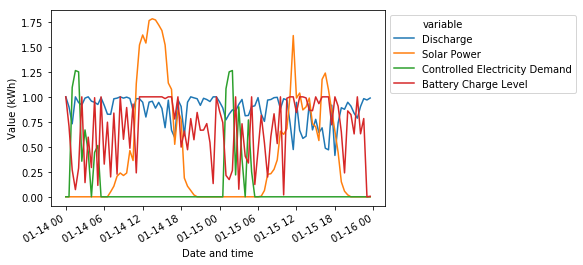

In [33]:
see_status = results_long[results_long['variable'].isin(["Battery Charge Level", "Solar Power", "Discharge","Controlled Electricity Demand"])]

sns_plot = sns.lineplot(data=see_status[see_status.datetime<"2013-01-16"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

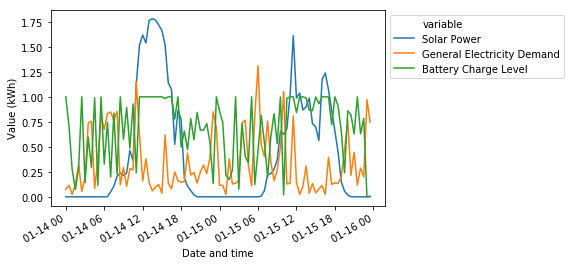

In [34]:
see_status = results_long[results_long['variable'].isin(["Battery Charge Level", "Solar Power", "General Electricity Demand"])]

sns_plot = sns.lineplot(data=see_status[see_status.datetime<"2013-01-16"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()

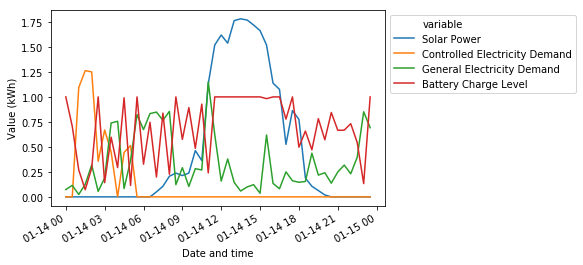

In [35]:
see_status = results_long[results_long['variable'].isin(["Battery Charge Level", "General Electricity Demand", "Controlled Electricity Demand","Solar Power"])]

sns_plot = sns.lineplot(data=see_status[see_status.datetime<"2013-01-15"], x="datetime", y="value", hue="variable")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.xlabel("Date and time")
plt.ylabel("Value (kWh)")
sns_plot.get_figure().autofmt_xdate()